# Collaborative filtering using fastai

In [15]:
import pandas as pd

In [16]:
df = pd.read_hdf("reviews_small.h5", "df")

In [17]:
df.head()

,product_id,recommended,date,username
0,646380.0,1.0,"7 December, 2017",S0_GosU
1,570.0,1.0,2018-07-09,S0_GosU
2,450390.0,1.0,2018-07-09,S0_GosU
3,368730.0,0.0,2017-03-25,S0_GosU
4,26800.0,1.0,2018-07-09,S0_GosU


## preprocessing for fasatai

In [18]:
from fastai.collab import *
from fastai.tabular import *

In [19]:
df = df.drop(["date"], axis=1)

In [20]:
df.head()

,product_id,recommended,username
0,646380.0,1.0,S0_GosU
1,570.0,1.0,S0_GosU
2,450390.0,1.0,S0_GosU
3,368730.0,0.0,S0_GosU
4,26800.0,1.0,S0_GosU


In [21]:
df.shape

(1735173, 3)

In [23]:
csvfile = "steam.csv"
df_games = pd.read_csv(csvfile)
df_games = df_games[["appid", "name"]]
df_games = df_games.rename(columns={"appid": "product_id"}, errors="raise")

In [24]:
df_games

,product_id,name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force
...,...,...
27070,1065230,Room of Pandora
27071,1065570,Cyber Gun
27072,1065650,Super Star Blast
27073,1066700,New Yankee 7: Deer Hunters


In [26]:
df["product_id"] = df["product_id"].astype(int)
df = df.merge(df_games, how = "left", on = "product_id")

In [27]:
df.head()

,product_id,recommended,username,name
0,646380,1.0,S0_GosU,Uphill Skiing
1,570,1.0,S0_GosU,Dota 2
2,450390,1.0,S0_GosU,The Lab
3,368730,0.0,S0_GosU,No Time To Explain Remastered
4,26800,1.0,S0_GosU,Braid


## training collab

In [29]:
df_shuffle = df.sample(frac=1).reset_index(drop=True)

In [30]:
df_shuffle.head()

,product_id,recommended,username,name
0,611790,1.0,Grunt95,House Party
1,233470,0.0,「Ｂｏｋｕ♥」,Evoland
2,821610,0.0,Beans,My Sunny Resort
3,302710,0.0,Styxplorer,BlazeRush
4,346920,0.0,(YouTube)Dragnix,Undead Shadows


In [31]:
#df_shuffle.to_hdf("df_shuffle.h5", key="df_shuffle", mode="w")

In [32]:
df_shuffle = pd.read_hdf("df_shuffle.h5", "df_shuffle")

In [33]:
data = CollabDataBunch.from_df(
    df_shuffle, user_name="username", item_name="name", rating_name="recommended", seed=36
)

In [12]:
# `CollabDataBunch.from_df` does spliting into train and validation set. 

In [34]:
learn = collab_learner(data, n_factors=50)

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-01
Min loss divided by 10: 6.31E-02


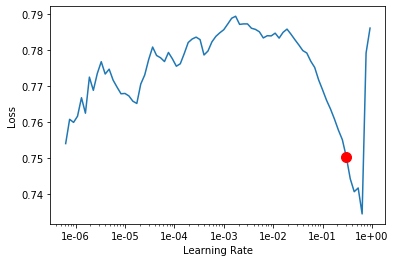

In [36]:
learn.recorder.plot(suggestion=True)

In [37]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.3019951720402019

In [38]:
#lr is very unstable,I choose `0.005` to stay on the save side.
lr = 0.005

In [39]:
%%time
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,time
0,0.182566,0.183106,02:09
1,0.160787,0.162303,01:54
2,0.111344,0.154915,01:55


CPU times: user 5min 16s, sys: 49.2 s, total: 6min 5s
Wall time: 5min 58s


In [40]:
learn.save('dotprod4')